<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/data.csv", engine='python', encoding='latin1', on_bad_lines='skip')

In [3]:
display(data.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49912 entries, 0 to 49911
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49912 non-null  object 
 1   StockCode    49912 non-null  object 
 2   Description  49770 non-null  object 
 3   Quantity     49912 non-null  int64  
 4   InvoiceDate  49912 non-null  object 
 5   UnitPrice    49911 non-null  float64
 6   CustomerID   32030 non-null  float64
 7   Country      49911 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,49912.0,8.294218,55.576019,-9360.0,1.00,2.00,8.00,2880.00
UnitPrice,49911.0,6.423712,166.653120,0.0,1.25,2.51,4.25,16888.02
CustomerID,32030.0,15426.016422,1752.300279,12347.0,14057.00,15464.00,17041.00,18283.00


In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,142
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,17882
Country,1


In [7]:
data.shape

(49912, 8)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
# handling negative values from quantity and unitprice

In [11]:
data = data[data['Quantity']>0]
data[data['UnitPrice']<0].shape[0]

0

In [12]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [13]:
data.shape

(31150, 8)

Calculating Total Sales or Monetary Value

In [14]:
data['sales'] = data['Quantity']*data['UnitPrice']
new_data = data.groupby('CustomerID')['sales'].sum().reset_index()

In [15]:
new_data

,CustomerID,sales
0,12347.0,711.79
1,12348.0,892.80
2,12370.0,1868.02
3,12377.0,1001.52
4,12383.0,600.72
...,...,...
967,18245.0,365.73
968,18259.0,376.30
969,18260.0,230.70
970,18269.0,168.60


calculating no. of transaction

In [16]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12347.0,31
1,12348.0,17
2,12370.0,91
3,12377.0,43
4,12383.0,37
...,...,...
967,18245.0,27
968,18259.0,7
969,18260.0,11
970,18269.0,7


calculating last transaction

In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['last transaction'] = (data['InvoiceDate'].max()-data['InvoiceDate']).dt.days
lt = data.groupby(['CustomerID','Country'])['last transaction'].max().reset_index()
merge_table = pd.merge(lt,num_trans,how='inner' ,on='CustomerID')
new_df = pd.merge(merge_table,new_data,how ='inner' ,on='CustomerID')
print(lt)
print(new_df)

     CustomerID         Country  last transaction
0       12347.0         Iceland                32
1       12348.0         Finland                23
2       12370.0         Austria                23
3       12370.0          Cyprus                26
4       12377.0     Switzerland                20
..          ...             ...               ...
968     18245.0  United Kingdom                20
969     18259.0  United Kingdom                32
970     18260.0  United Kingdom                23
971     18269.0  United Kingdom                32
972     18283.0  United Kingdom                 3

[973 rows x 3 columns]
     CustomerID         Country  last transaction  InvoiceNo    sales
0       12347.0         Iceland                32         31   711.79
1       12348.0         Finland                23         17   892.80
2       12370.0         Austria                23         91  1868.02
3       12370.0          Cyprus                26         91  1868.02
4       12377.0     Switze

iqr

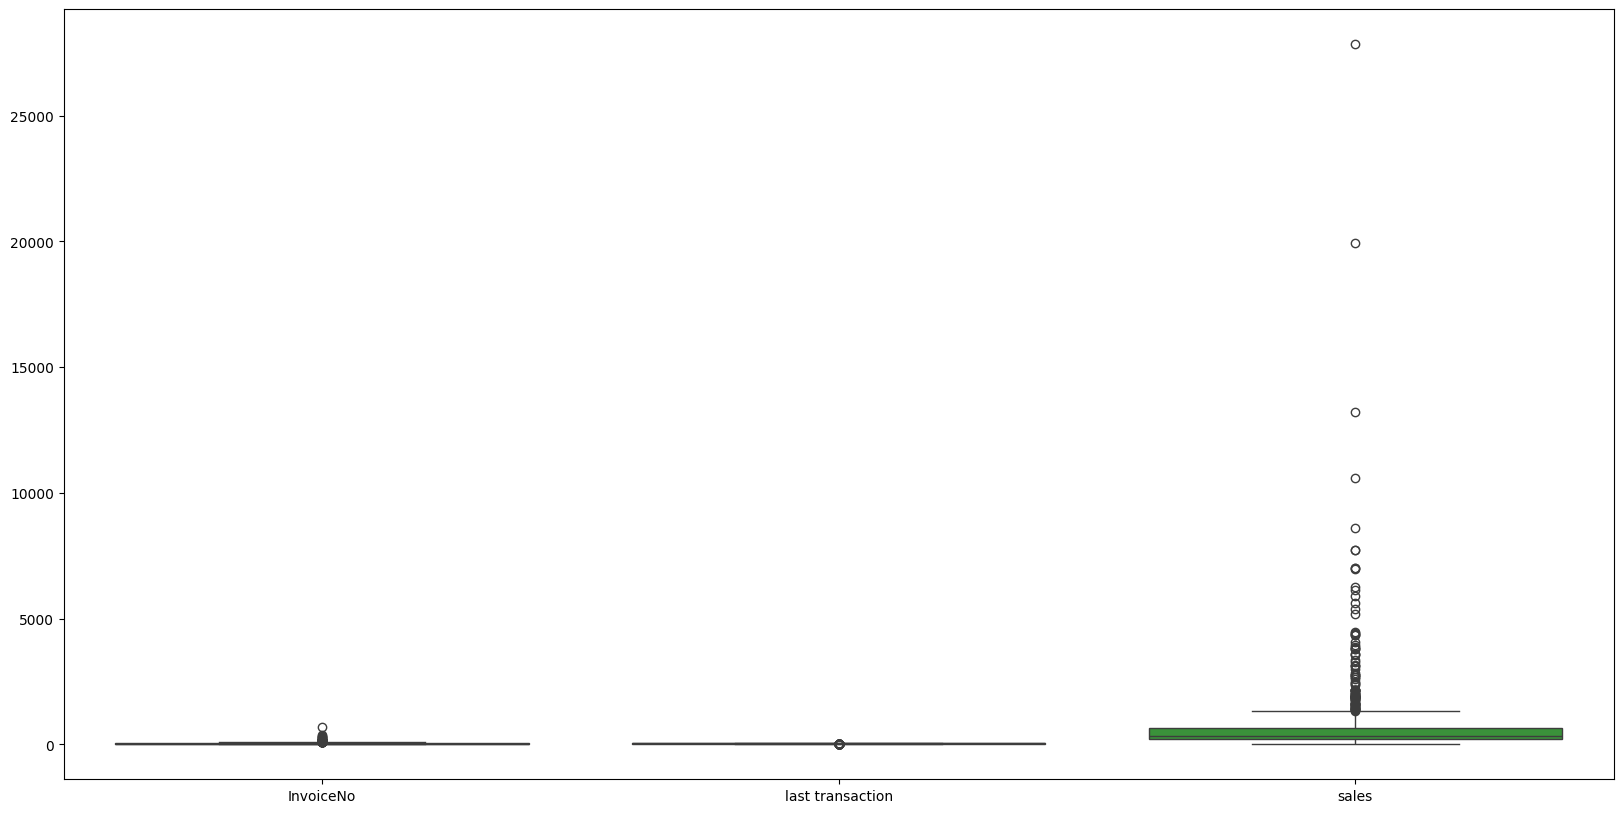

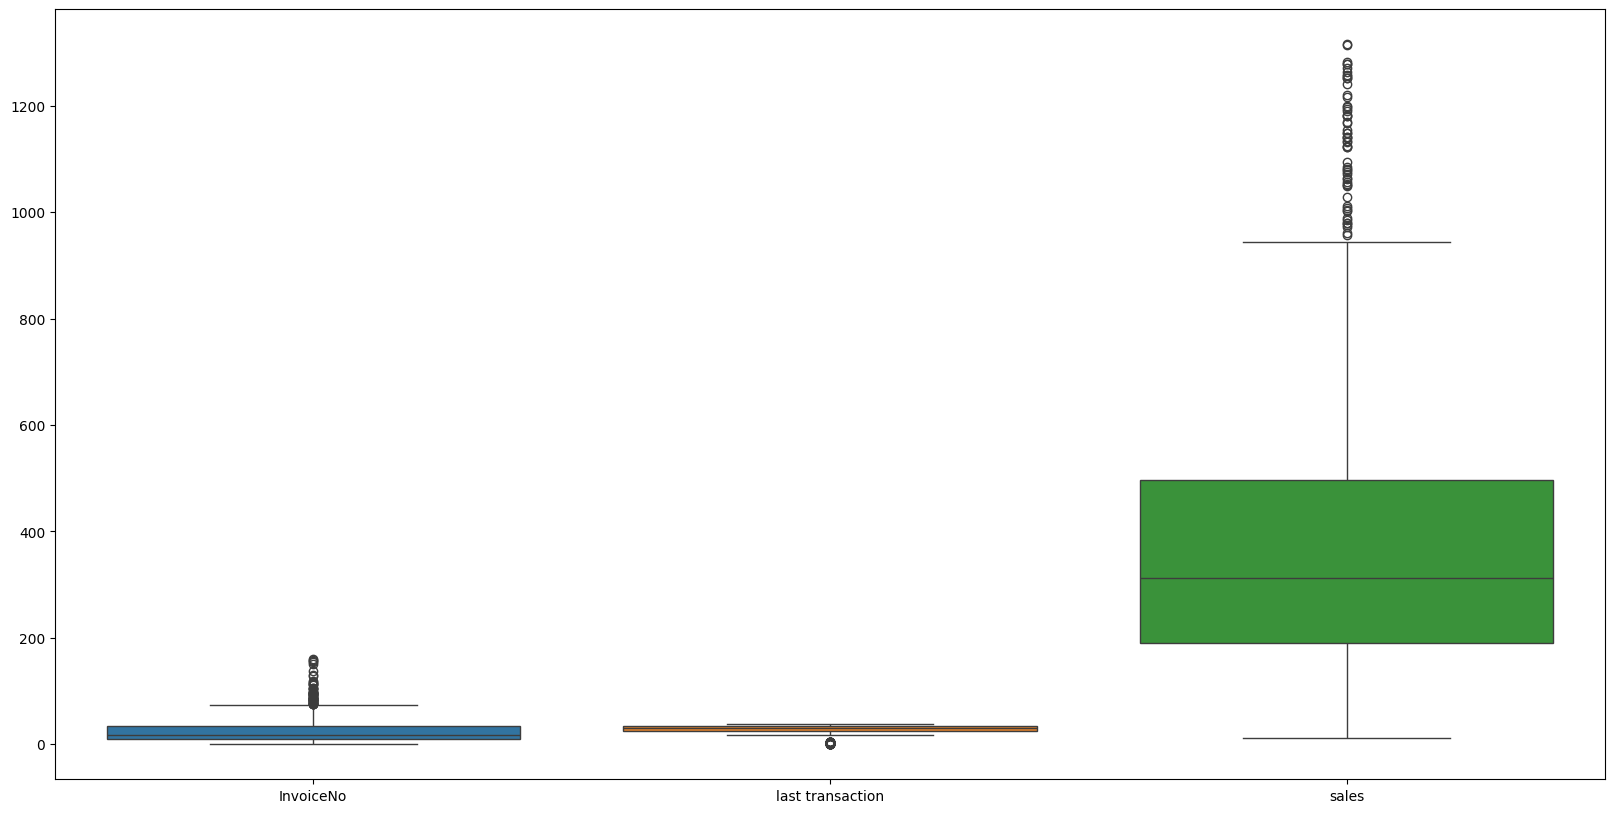

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'last transaction', 'sales']])
plt.show()

IQR = new_df['sales'].quantile(0.75) - new_df['sales'].quantile(0.25)
lower_limit = new_df['sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['sales'] < upper_limit) & (new_df['sales'] > lower_limit)].copy()

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'last transaction', 'sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

min max scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['last transaction','InvoiceNo','sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.820513,0.18750,0.536616,Iceland
1,0.589744,0.10000,0.675509,Finland
2,0.512821,0.26250,0.758932,Switzerland
3,0.461538,0.22500,0.451390,Belgium
4,0.820513,0.05625,0.298832,Australia
...,...,...,...,...
873,0.512821,0.16250,0.271078,United Kingdom
874,0.820513,0.03750,0.279189,United Kingdom
875,0.589744,0.06250,0.167467,United Kingdom
876,0.820513,0.03750,0.119817,United Kingdom


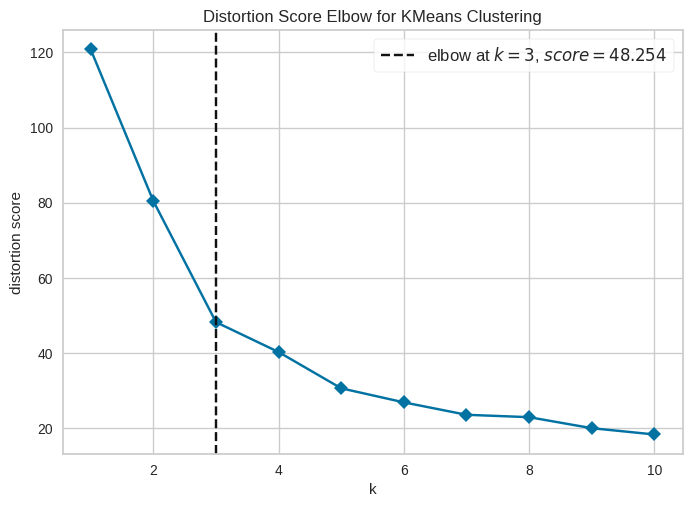

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

Model Evalution

hierarchical clustering

In [22]:

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

,Last Transaction,InvoiceNo,Sales,clusters_hierarchial
0,0.820513,0.18750,0.536616,1
1,0.589744,0.10000,0.675509,1
2,0.512821,0.26250,0.758932,1
3,0.461538,0.22500,0.451390,0
4,0.820513,0.05625,0.298832,0
5,0.923077,0.18750,0.512162,1
6,0.051282,0.14375,0.358184,2
7,0.589744,0.06250,0.213997,0
8,0.487179,0.09375,0.173015,0
9,0.948718,0.05625,0.223328,0


In [23]:
# silhoutte score
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, model.labels_, metric='euclidean')
print(score)

0.26153192630928607


DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples=4)
y_predicted_dbscan = dbscan.fit_predict(df_k)
df_k['clusters_dbscan'] = y_predicted_dbscan
df_k

,Last Transaction,InvoiceNo,Sales,clusters_hierarchial,clusters_dbscan
0,0.820513,0.18750,0.536616,1,0
1,0.589744,0.10000,0.675509,1,0
2,0.512821,0.26250,0.758932,1,0
3,0.461538,0.22500,0.451390,0,1
4,0.820513,0.05625,0.298832,0,1
...,...,...,...,...,...
873,0.512821,0.16250,0.271078,0,1
874,0.820513,0.03750,0.279189,0,1
875,0.589744,0.06250,0.167467,0,1
876,0.820513,0.03750,0.119817,0,1


In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k,dbscan.labels_,metric='euclidean')
print(score)

0.8106554715613291


from these dbscan is working fine